<a href="https://colab.research.google.com/github/alisterjones74/edits/blob/main/Copy_of_pointcloud2mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/openai/point-e

Cloning into 'point-e'...
remote: Enumerating objects: 57, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 57 (delta 5), reused 3 (delta 3), pack-reused 39
Unpacking objects: 100% (57/57), done.


In [3]:
pip install -U scikit-image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.0 MB 6.5 MB/s 
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3


In [4]:
cd /content/point-e

/content/point-e


In [5]:
pip install -e .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/point-e
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-install-k94xhcb0/clip_fee2a8439c324e5796ca252a18df6ce4
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-install-k94xhcb0/clip_fee2a8439c324e5796ca252a18df6ce4
     |████████████████████████████████| 88 kB 4.2 MB/s 
     |████████████████████████████████| 53 kB 2.1 MB/s 
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369408 sha256=96e600628eb70a5dc4a2b7ce180f16b59d2564a8aa9634ef1320200a1cfb48db
  Stored in directory: /tmp/pip-ephem-wheel-cache-now3l54x/wheels/ab/4f/3a/5e51521b55997aa6f0690e095c08824219753128ce8d9969a3
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116949 sha256=718c9aa1c652e7aa419cf8dc906ad956f5153937fbb9e95c8d014fd1e15ff245
  Stored in directory: /root/.cache/pip/wheels/5b/eb/43/7295e71293b218ddfd627f935229bf54af

In [6]:
from PIL import Image
import torch
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

from point_e.models.download import load_checkpoint
from point_e.models.configs import MODEL_CONFIGS, model_from_config
from point_e.util.pc_to_mesh import marching_cubes_mesh
from point_e.util.plotting import plot_point_cloud
from point_e.util.point_cloud import PointCloud

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('creating SDF model...')
name = 'sdf'
model = model_from_config(MODEL_CONFIGS[name], device)
model.eval()

print('loading SDF model...')
model.load_state_dict(load_checkpoint(name, device))

creating SDF model...
loading SDF model...


  0%|          | 0.00/38.0M [00:00<?, ?iB/s]

<All keys matched successfully>

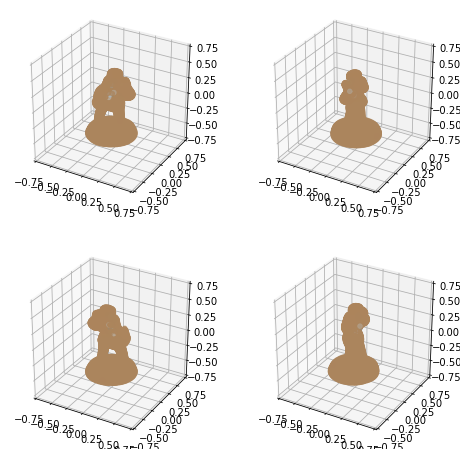

In [8]:
# Load a point cloud we want to convert into a mesh.
pc = PointCloud.load('/content/drive/MyDrive/IED/Pointe/out.npz')

# Plot the point cloud as a sanity check.
fig = plot_point_cloud(pc, grid_size=2)

In [9]:
# Produce a mesh (with vertex colors)
mesh = marching_cubes_mesh(
    pc=pc,
    model=model,
    batch_size=4096,
    grid_size=64, # increase to 128 for resolution used in evals
    progress=True,
)

  0%|          | 0/64 [00:00<?, ?it/s]

In [10]:
# Write the mesh to a PLY file to import into some other program.
with open('/content/drive/MyDrive/IED/Pointe/mesh.ply', 'wb') as f:
    mesh.write_ply(f)

In [11]:
ls /content/drive/MyDrive/IED/Pointe

mesh.ply  out.npz
